## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updati

50000/50000 [==============================] - 17s 334us/step - loss: 2.4626 - acc: 0.0985 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 16s 314us/step - loss: 2.4626 - acc: 0.0991 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 16s 317us/step - loss: 2.4626 - acc: 0.0981 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 16s 330us/step - loss: 2.4626 - acc: 0.0978 - val_loss: 2.4625 - val_acc: 0.1000
Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dens

Epoch 48/50
50000/50000 [==============================] - 16s 315us/step - loss: 2.7142 - acc: 0.6242 - val_loss: 3.0084 - val_acc: 0.5201
Epoch 49/50
50000/50000 [==============================] - 16s 314us/step - loss: 2.6740 - acc: 0.6263 - val_loss: 2.9446 - val_acc: 0.5336
Epoch 50/50
50000/50000 [==============================] - 16s 320us/step - loss: 2.6364 - acc: 0.6258 - val_loss: 2.9225 - val_acc: 0.5213
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (

Epoch 49/50
50000/50000 [==============================] - 16s 320us/step - loss: 0.8902 - acc: 0.6868 - val_loss: 1.4146 - val_acc: 0.5241
Epoch 50/50
50000/50000 [==============================] - 16s 317us/step - loss: 0.8786 - acc: 0.6913 - val_loss: 1.4116 - val_acc: 0.5289
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)         

Epoch 50/50
50000/50000 [==============================] - 14s 286us/step - loss: 0.8810 - acc: 0.6924 - val_loss: 1.3775 - val_acc: 0.5360


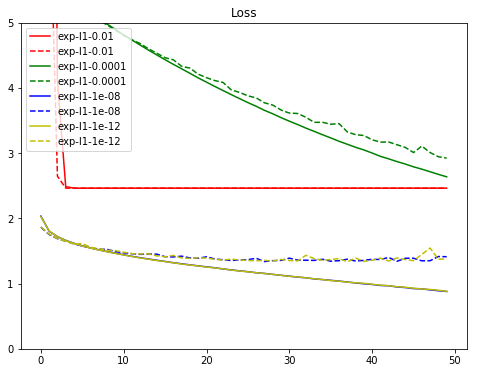

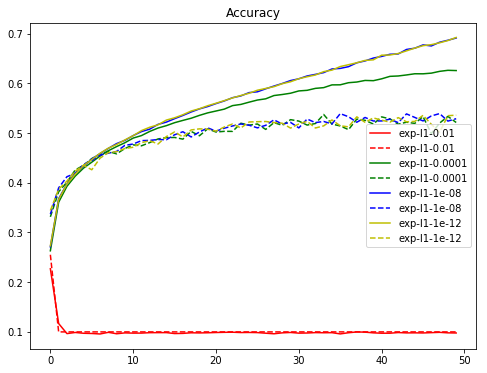

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_ratio,l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_ratio,l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [10]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio_L1 in L1_EXP:
    for regulizer_ratio_L2 in L2_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with L1 Regulizer = %.6f" % (regulizer_ratio_L1))
        print("Experiment with L2 Regulizer = %.6f" % (regulizer_ratio_L2))
        model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio_L1, l2_ratio=regulizer_ratio_L2)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(regulizer_ratio_L1),str(regulizer_ratio_L2))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L1 Regulizer = 0.010000
Experiment with L2 Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Ep

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 368us/step - loss: 198.9398 - acc: 0.2428 - val_loss: 41.2894 - val_acc: 0.2608
Epoch 2/50
50000/50000 [==============================] - 17s 348us/step - loss: 19.2088 - acc: 0.1203 - val_loss: 7.2830 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 17s 341us/step - loss: 4.1004 - acc: 0.0985 - val_loss: 2.6487 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 17s 343us/step - loss: 2.4869 - acc: 0.0999 - val_loss: 2.4628 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 17s 345us/step - loss: 2.4626 - acc: 0.0971 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 17s 343us/step - loss: 2.4626 - acc: 0.0993 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 18s 364us/step - loss: 2.4626 - acc: 0.0988 - val_loss

50000/50000 [==============================] - 17s 344us/step - loss: 198.5496 - acc: 0.2411 - val_loss: 41.1043 - val_acc: 0.2521
Epoch 2/50
50000/50000 [==============================] - 17s 348us/step - loss: 19.1218 - acc: 0.1121 - val_loss: 7.3018 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 17s 346us/step - loss: 4.1073 - acc: 0.0994 - val_loss: 2.6441 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 19s 377us/step - loss: 2.4856 - acc: 0.0992 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 18s 350us/step - loss: 2.4626 - acc: 0.0998 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 17s 344us/step - loss: 2.4626 - acc: 0.0992 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 17s 345us/step - loss: 2.4626 - acc: 0.0972 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==========

50000/50000 [==============================] - 19s 374us/step - loss: 198.6274 - acc: 0.2331 - val_loss: 41.1681 - val_acc: 0.2594
Epoch 2/50
50000/50000 [==============================] - 18s 358us/step - loss: 19.1621 - acc: 0.1132 - val_loss: 7.3347 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 17s 349us/step - loss: 4.1372 - acc: 0.0991 - val_loss: 2.6517 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 17s 341us/step - loss: 2.4863 - acc: 0.0977 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 17s 343us/step - loss: 2.4626 - acc: 0.0978 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 17s 344us/step - loss: 2.4626 - acc: 0.0989 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 17s 343us/step - loss: 2.4626 - acc: 0.0988 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==========

50000/50000 [==============================] - 18s 369us/step - loss: 18.7916 - acc: 0.2799 - val_loss: 17.3612 - val_acc: 0.3359
Epoch 2/50
50000/50000 [==============================] - 18s 362us/step - loss: 16.1420 - acc: 0.3578 - val_loss: 14.9814 - val_acc: 0.3638
Epoch 3/50
50000/50000 [==============================] - 17s 346us/step - loss: 13.9619 - acc: 0.3799 - val_loss: 12.9789 - val_acc: 0.3867
Epoch 4/50
50000/50000 [==============================] - 18s 368us/step - loss: 12.1150 - acc: 0.3930 - val_loss: 11.2797 - val_acc: 0.4001
Epoch 5/50
50000/50000 [==============================] - 17s 343us/step - loss: 10.5454 - acc: 0.3988 - val_loss: 9.8332 - val_acc: 0.4071
Epoch 6/50
50000/50000 [==============================] - 17s 345us/step - loss: 9.2071 - acc: 0.4077 - val_loss: 8.5977 - val_acc: 0.4139
Epoch 7/50
50000/50000 [==============================] - 20s 395us/step - loss: 8.0677 - acc: 0.4120 - val_loss: 7.5504 - val_acc: 0.4167
Epoch 8/50
50000/50000 [=====

50000/50000 [==============================] - 19s 377us/step - loss: 6.1321 - acc: 0.2747 - val_loss: 5.9391 - val_acc: 0.3438
Epoch 2/50
50000/50000 [==============================] - 19s 373us/step - loss: 5.8480 - acc: 0.3681 - val_loss: 5.7681 - val_acc: 0.3762
Epoch 3/50
50000/50000 [==============================] - 17s 347us/step - loss: 5.6964 - acc: 0.3968 - val_loss: 5.6360 - val_acc: 0.4029
Epoch 4/50
50000/50000 [==============================] - 17s 347us/step - loss: 5.5697 - acc: 0.4177 - val_loss: 5.5192 - val_acc: 0.4212
Epoch 5/50
50000/50000 [==============================] - 17s 347us/step - loss: 5.4553 - acc: 0.4319 - val_loss: 5.4039 - val_acc: 0.4349
Epoch 6/50
50000/50000 [==============================] - 17s 346us/step - loss: 5.3475 - acc: 0.4487 - val_loss: 5.3125 - val_acc: 0.4408
Epoch 7/50
50000/50000 [==============================] - 17s 346us/step - loss: 5.2488 - acc: 0.4573 - val_loss: 5.2219 - val_acc: 0.4501
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 17s 337us/step - loss: 6.0300 - acc: 0.2624 - val_loss: 5.8297 - val_acc: 0.3342
Epoch 2/50
50000/50000 [==============================] - 16s 326us/step - loss: 5.7324 - acc: 0.3610 - val_loss: 5.6484 - val_acc: 0.3733
Epoch 3/50
50000/50000 [==============================] - 16s 319us/step - loss: 5.5831 - acc: 0.3902 - val_loss: 5.5191 - val_acc: 0.4006
Epoch 4/50
50000/50000 [==============================] - 17s 339us/step - loss: 5.4600 - acc: 0.4111 - val_loss: 5.4168 - val_acc: 0.4124
Epoch 5/50
50000/50000 [==============================] - 16s 329us/step - loss: 5.3505 - acc: 0.4276 - val_loss: 5.3048 - val_acc: 0.4280
Epoch 6/50
50000/50000 [==============================] - 16s 326us/step - loss: 5.2491 - acc: 0.4422 - val_loss: 5.2075 - val_acc: 0.4418
Epoch 7/50
50000/50000 [==============================] - 16s 322us/step - loss: 5.1537 - acc: 0.4547 - val_loss: 5.1144 - val_acc: 0.4499
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 16s 321us/step - loss: 6.0223 - acc: 0.2719 - val_loss: 5.8157 - val_acc: 0.3426
Epoch 2/50
50000/50000 [==============================] - 15s 303us/step - loss: 5.7251 - acc: 0.3667 - val_loss: 5.6464 - val_acc: 0.3797
Epoch 3/50
50000/50000 [==============================] - 16s 314us/step - loss: 5.5751 - acc: 0.3963 - val_loss: 5.5178 - val_acc: 0.4089
Epoch 4/50
50000/50000 [==============================] - 15s 301us/step - loss: 5.4521 - acc: 0.4160 - val_loss: 5.3969 - val_acc: 0.4267
Epoch 5/50
50000/50000 [==============================] - 15s 299us/step - loss: 5.3422 - acc: 0.4326 - val_loss: 5.2934 - val_acc: 0.4439
Epoch 6/50
50000/50000 [==============================] - 15s 299us/step - loss: 5.2422 - acc: 0.4459 - val_loss: 5.2142 - val_acc: 0.4434
Epoch 7/50
50000/50000 [==============================] - 17s 334us/step - loss: 5.1479 - acc: 0.4577 - val_loss: 5.1151 - val_acc: 0.4592
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 17s 334us/step - loss: 15.0776 - acc: 0.2729 - val_loss: 13.9471 - val_acc: 0.3515
Epoch 2/50
50000/50000 [==============================] - 15s 309us/step - loss: 13.0159 - acc: 0.3606 - val_loss: 12.1176 - val_acc: 0.3770
Epoch 3/50
50000/50000 [==============================] - 16s 328us/step - loss: 11.3406 - acc: 0.3853 - val_loss: 10.5857 - val_acc: 0.4001
Epoch 4/50
50000/50000 [==============================] - 17s 335us/step - loss: 9.9288 - acc: 0.3992 - val_loss: 9.2920 - val_acc: 0.4061
Epoch 5/50
50000/50000 [==============================] - 16s 316us/step - loss: 8.7280 - acc: 0.4105 - val_loss: 8.1940 - val_acc: 0.4103
Epoch 6/50
50000/50000 [==============================] - 16s 324us/step - loss: 7.7058 - acc: 0.4186 - val_loss: 7.2550 - val_acc: 0.4180
Epoch 7/50
50000/50000 [==============================] - 16s 320us/step - loss: 6.8338 - acc: 0.4231 - val_loss: 6.4468 - val_acc: 0.4235
Epoch 8/50
50000/50000 [========

50000/50000 [==============================] - 16s 324us/step - loss: 2.1794 - acc: 0.2689 - val_loss: 2.0053 - val_acc: 0.3420
Epoch 2/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.9443 - acc: 0.3668 - val_loss: 1.8919 - val_acc: 0.3824
Epoch 3/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.8627 - acc: 0.3944 - val_loss: 1.8419 - val_acc: 0.3980
Epoch 4/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.8087 - acc: 0.4140 - val_loss: 1.7934 - val_acc: 0.4135
Epoch 5/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.7641 - acc: 0.4294 - val_loss: 1.7618 - val_acc: 0.4262
Epoch 6/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.7244 - acc: 0.4463 - val_loss: 1.7316 - val_acc: 0.4369
Epoch 7/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.6900 - acc: 0.4594 - val_loss: 1.6920 - val_acc: 0.4512
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 16s 329us/step - loss: 2.0190 - acc: 0.2793 - val_loss: 1.8616 - val_acc: 0.3436
Epoch 2/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.7975 - acc: 0.3705 - val_loss: 1.7558 - val_acc: 0.3849
Epoch 3/50
50000/50000 [==============================] - 16s 317us/step - loss: 1.7173 - acc: 0.3972 - val_loss: 1.6893 - val_acc: 0.4083
Epoch 4/50
50000/50000 [==============================] - 16s 314us/step - loss: 1.6585 - acc: 0.4200 - val_loss: 1.6374 - val_acc: 0.4249
Epoch 5/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.6113 - acc: 0.4354 - val_loss: 1.6059 - val_acc: 0.4373
Epoch 6/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.5703 - acc: 0.4483 - val_loss: 1.5722 - val_acc: 0.4492
Epoch 7/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.5345 - acc: 0.4608 - val_loss: 1.5502 - val_acc: 0.4584
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 16s 322us/step - loss: 2.0387 - acc: 0.2705 - val_loss: 1.8700 - val_acc: 0.3386
Epoch 2/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.8034 - acc: 0.3700 - val_loss: 1.7594 - val_acc: 0.3817
Epoch 3/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.7185 - acc: 0.3985 - val_loss: 1.6895 - val_acc: 0.4035
Epoch 4/50
50000/50000 [==============================] - 15s 307us/step - loss: 1.6600 - acc: 0.4177 - val_loss: 1.6396 - val_acc: 0.4276
Epoch 5/50
50000/50000 [==============================] - 15s 307us/step - loss: 1.6112 - acc: 0.4347 - val_loss: 1.5979 - val_acc: 0.4406
Epoch 6/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.5708 - acc: 0.4485 - val_loss: 1.5674 - val_acc: 0.4504
Epoch 7/50
50000/50000 [==============================] - 15s 307us/step - loss: 1.5370 - acc: 0.4606 - val_loss: 1.5507 - val_acc: 0.4509
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 16s 326us/step - loss: 15.0940 - acc: 0.2682 - val_loss: 13.9570 - val_acc: 0.3352
Epoch 2/50
50000/50000 [==============================] - 16s 313us/step - loss: 13.0279 - acc: 0.3519 - val_loss: 12.1318 - val_acc: 0.3675
Epoch 3/50
50000/50000 [==============================] - 15s 309us/step - loss: 11.3560 - acc: 0.3748 - val_loss: 10.5994 - val_acc: 0.3917
Epoch 4/50
50000/50000 [==============================] - 15s 309us/step - loss: 9.9426 - acc: 0.3900 - val_loss: 9.3003 - val_acc: 0.3957
Epoch 5/50
50000/50000 [==============================] - 16s 311us/step - loss: 8.7423 - acc: 0.4006 - val_loss: 8.1962 - val_acc: 0.4090
Epoch 6/50
50000/50000 [==============================] - 16s 311us/step - loss: 7.7187 - acc: 0.4076 - val_loss: 7.2535 - val_acc: 0.4153
Epoch 7/50
50000/50000 [==============================] - 16s 312us/step - loss: 6.8451 - acc: 0.4142 - val_loss: 6.4467 - val_acc: 0.4220
Epoch 8/50
50000/50000 [========

50000/50000 [==============================] - 16s 327us/step - loss: 2.1538 - acc: 0.2806 - val_loss: 1.9906 - val_acc: 0.3468
Epoch 2/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.9391 - acc: 0.3705 - val_loss: 1.8966 - val_acc: 0.3767
Epoch 3/50
50000/50000 [==============================] - 15s 310us/step - loss: 1.8574 - acc: 0.3965 - val_loss: 1.8242 - val_acc: 0.4069
Epoch 4/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.7998 - acc: 0.4160 - val_loss: 1.7762 - val_acc: 0.4220
Epoch 5/50
50000/50000 [==============================] - 15s 310us/step - loss: 1.7530 - acc: 0.4341 - val_loss: 1.7343 - val_acc: 0.4344
Epoch 6/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.7132 - acc: 0.4476 - val_loss: 1.7042 - val_acc: 0.4432
Epoch 7/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.6797 - acc: 0.4568 - val_loss: 1.6858 - val_acc: 0.4515
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 16s 329us/step - loss: 2.0344 - acc: 0.2760 - val_loss: 1.8658 - val_acc: 0.3427
Epoch 2/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.8100 - acc: 0.3656 - val_loss: 1.7617 - val_acc: 0.3831
Epoch 3/50
50000/50000 [==============================] - 16s 312us/step - loss: 1.7222 - acc: 0.3999 - val_loss: 1.6969 - val_acc: 0.4068
Epoch 4/50
50000/50000 [==============================] - 16s 310us/step - loss: 1.6616 - acc: 0.4177 - val_loss: 1.6493 - val_acc: 0.4194
Epoch 5/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.6159 - acc: 0.4343 - val_loss: 1.5982 - val_acc: 0.4357
Epoch 6/50
50000/50000 [==============================] - 15s 306us/step - loss: 1.5781 - acc: 0.4453 - val_loss: 1.5797 - val_acc: 0.4417
Epoch 7/50
50000/50000 [==============================] - 15s 310us/step - loss: 1.5459 - acc: 0.4589 - val_loss: 1.5422 - val_acc: 0.4590
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 16s 320us/step - loss: 2.0254 - acc: 0.2767 - val_loss: 1.8631 - val_acc: 0.3462
Epoch 2/50
50000/50000 [==============================] - 15s 303us/step - loss: 1.8013 - acc: 0.3694 - val_loss: 1.7545 - val_acc: 0.3934
Epoch 3/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.7142 - acc: 0.4007 - val_loss: 1.6836 - val_acc: 0.4115
Epoch 4/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.6540 - acc: 0.4209 - val_loss: 1.6266 - val_acc: 0.4350
Epoch 5/50
50000/50000 [==============================] - 16s 314us/step - loss: 1.6061 - acc: 0.4371 - val_loss: 1.5975 - val_acc: 0.4384
Epoch 6/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.5683 - acc: 0.4510 - val_loss: 1.5633 - val_acc: 0.4510
Epoch 7/50
50000/50000 [==============================] - 16s 312us/step - loss: 1.5339 - acc: 0.4640 - val_loss: 1.5316 - val_acc: 0.4649
Epoch 8/50
50000/50000 [==============

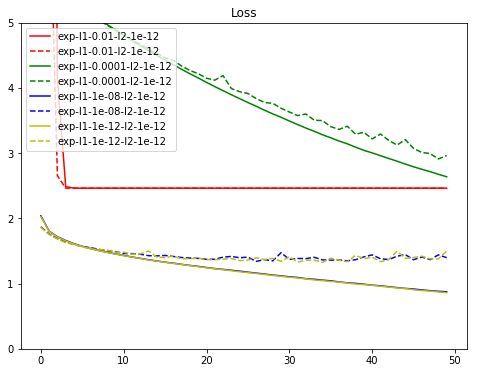

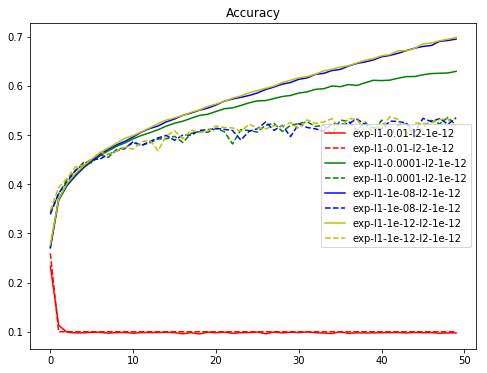

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()